# Modeling Development

### We will apply different ML classification methods (KNN, DT, RF, SVM), as well as a DL classification method (DNN) and compare the accuracy of prediction of the classification models in predicting whether the mushrooms are edible or poisonous from the training data fed into the model.

#### Importing Packages

In [20]:
import keras
import tensorflow

# Helper packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

# Modeling process
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, accuracy_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Data Processing

In [21]:
data = pd.read_csv('../data/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


##### Since the dataset is categorical, and we want to perform a ML (or DL) model, we need to encode the dataset.

In [22]:
le = preprocessing.LabelEncoder()
data_en = data
for i in data_en.columns.tolist():
    data_en[i]= le.fit_transform(data_en[i])
data_en.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


##### Now, we define `Y` to be the __class__ feature, which shows whether a certain mushroom is poisonous or edible based on the other features.
##### Notice that in the definition of the set `X`, the __class__ feature is dropped.

In [23]:

X = data_en.iloc[:,1:23].values
Y = data_en.iloc[:,0].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

### Decision Tree (DT) Modeling

#### Decision Trees are a non-parametric supervised learning method used for classification and regression. Our aim is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features using decision trees.

In [24]:
# Decision Tree
tree = DecisionTreeClassifier()

# training and prediction
tree.fit(X_train, Y_train)
tree_pred = tree.predict(X_test)

# evaluation
print('Confusion Matrix :\n', confusion_matrix(Y_test, tree_pred))
print()
print('Classification Report :\n', classification_report(Y_test, tree_pred))

Confusion Matrix :
 [[852   0]
 [  0 773]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### K-nearest neighbors (KNN) Modeling

#### K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. It assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. Since K-NN algorithm stores all the available data and classifies a new data point based on the similarity, the new data can be easily classified into a well suite category by using K- NN algorithm.

In [25]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

k_pred = classifier.predict(X_test)

print('Confusion Matrix :\n', confusion_matrix(Y_test, k_pred))
print()
print('Classification Report :\n', classification_report(Y_test, k_pred))

Confusion Matrix :
 [[848   4]
 [  1 772]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       0.99      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Random Forest (RF) Modeling

#### Random forest is a supervised machine learning algorithm that is used widely in classification and regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression. However, it has a relatively high time complexity.

In [26]:
parameters = {'n_estimators': [100, 200, 300]}
search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=5)
search.fit(X_train, Y_train)
print(search.best_params_)

# prediction
rfc_pred = search.best_estimator_.predict(X_test)

# evaluation
print('Confusion Matrix :\n', confusion_matrix(Y_test, rfc_pred))
print()
print('Classification Report :\n', classification_report(Y_test, rfc_pred))

{'n_estimators': 100}
Confusion Matrix :
 [[852   0]
 [  0 773]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Support Vector Classifier (SVC) Modeling

In [27]:
# Support Vector Classifier
svc = SVC()

# training and prediction
svc.fit(X_train, Y_train)
svc_pred = svc.predict(X_test)

# evaluation
print('Confusion Matrix :\n', confusion_matrix(Y_test, svc_pred))
print()
print('Classification Report :\n', classification_report(Y_test, svc_pred))

Confusion Matrix :
 [[850   2]
 [ 14 759]]

Classification Report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       852
           1       1.00      0.98      0.99       773

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



### DNN Modeling

#### First, we initialize our model and add two hidden layers with respective units, 8 and 5, and a `Dropout`* layer and then an output layer.

##### * `The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.`

In [30]:
#Initializing DNN
DNN = tensorflow.keras.models.Sequential()

#Adding First Hidden Layer
DNN.add(tensorflow.keras.layers.Dense(units=8,activation="relu"))

#Adding Second Hidden Layer
DNN.add(tensorflow.keras.layers.Dense(units=5,activation="relu"))

#Adding Dropout Layer
DNN.add(tensorflow.keras.layers.Dropout(0.2,input_shape=(2,)))

#Adding Output Layer
DNN.add(tensorflow.keras.layers.Dense(units=1,activation="sigmoid"))



In [31]:
#Compiling DNN
DNN.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

#### After compiling the model, and before fitting it, it is nice to have an `EarlyStopping`* callback which makes the model stop training when a monitored metric has stopped improving.

##### *Important arguments:
`1- monitor: Quantity to be monitored, such as 'loss' or 'accuracy'.`

`2- min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.`

`3- patience: Number of epochs with no improvement after which training will be stopped.`

`4- verbose: Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action.`

In [34]:
#Fitting DNN
my_c = tensorflow.keras.callbacks.EarlyStopping( monitor='loss', patience=2)
DNN.fit(X_train,Y_train,batch_size=32,epochs = 100, callbacks=my_c, verbose=1)

Epoch 1/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0762 - accuracy: 0.9785
Epoch 2/100
204/204 [==============================] - 1s 2ms/step - loss: 0.0726 - accuracy: 0.9778
Epoch 3/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0702 - accuracy: 0.9803
Epoch 4/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0670 - accuracy: 0.9809
Epoch 5/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0661 - accuracy: 0.9803
Epoch 6/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0638 - accuracy: 0.9815
Epoch 7/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0644 - accuracy: 0.9818
Epoch 8/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0641 - accuracy: 0.9814


#### Next we interpret how well our model is performing, by investigating the confusion matrix, the classification report, the graph of the `ROC curve`*, and the area under the ROC curve.

##### * `An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.`

In [35]:
y_pred = DNN.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = DNN.evaluate(X_test, Y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
cm = confusion_matrix(Y_test, y_pred)


51/51 [==============================] - 0s 2ms/step
********************
163/163 [==============================] - 1s 2ms/step - loss: 0.0296 - accuracy: 0.9920
Test score: 0.029590081423521042
Test accuracy: 0.9919999837875366


Text(0.5, 15.0, 'Predicted label')

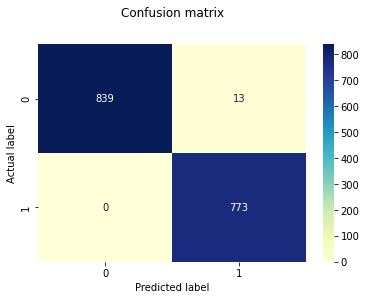

In [36]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       852
           1       0.98      1.00      0.99       773

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



51/51 [==============================] - 0s 3ms/step


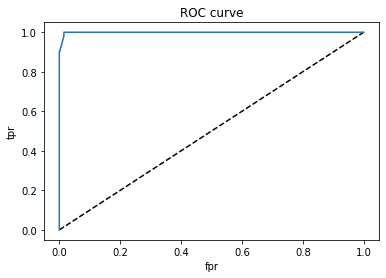

0.9990654361702773

In [38]:
y_pred_proba = DNN.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()
roc_auc_score(Y_test,y_pred_proba)

### Results and Comparison

#### Now, we compare between the previous models according to the accuracy, precision, recall, and f1 score.

In [39]:
# Creating a Performance report for all ML Models

classifier_pred = {'Decision Tree Classifier':tree_pred,'K Nearest Neighbors':k_pred,
                   'Random Forest Classifier':rfc_pred, 'Support Vector Classifier':svc_pred, 'Deep Neural Network': y_pred}

report = dict()

for key, value in classifier_pred.items():
    # calculating scores 
    accuracy = accuracy_score(Y_test, value)
    precision = precision_score(Y_test, value)
    recall = recall_score(Y_test, value)
    f1 = f1_score(Y_test, value)
    # entering scores in report
    report[key] = [accuracy, precision, recall, f1]

# report dataframe
report_df = pd.DataFrame(data=report, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
report_df.index.name = 'Model'
report_df

,Accuracy,Precision,Recall,F1 Score
Model,,,,
Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000
K Nearest Neighbors,0.996923,0.994845,0.998706,0.996772
Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
Support Vector Classifier,0.990154,0.997372,0.981889,0.989570
Deep Neural Network,0.992000,0.983461,1.000000,0.991661
